###  <U>SAFETY PREDICTION IN VARIOUS DISTRICTS OF CHICAGO IN DIFFERENT TIME OF THE YEAR</U>

#### GROUP MEMBERS: 
1. Sami Ahmad Khan, A20352677
2. Zeeshan Aamir Khavas, A20341778

#### PROJECT DESCRIPTION:

<b>TARGET:</b> 
<br>The target problem in this case is learning from the various types of crimes in various districts in Chicago and then predicting from the severity and number of occurrences of the crimes in all the districts of Chicago, the possibility of the occurence of crimes (safe and unsafe) in any district in the year 2017.
The safety is classified on the basis of the following parameters:

1. <b>Crime Type (Primary Type)</b> --> Each crime type has different crime score depending on the intensity or severeness of the crime in ascending order. For example, NARCOTICS has been assigned a score of 4 and THEFT has been assigned 1. <br>1 --> 4 (less sever --> extreme severe)
2. <b>Arrest (True or False)</b> --> If there is an arrest for a particular crime in a particular district, we increase   the crime score by 1 and then calculate the total crime weightage for that district for that particular crime type.

<b>DATASET LINK</b> 
<br>https://data.cityofchicago.org/api/views/kf95-mnd6/rows.csv?accessType=DOWNLOAD

<b>PROCEDURE</b><br>
We have followed the following steps in collecting and visualizing the data and eventually calculating the Label(Y):<br>
1. First we have read the complete input file i.e. Crimes.csv using Pandas's read_csv() function<br>
2. Then we create a new dataframe keeping the following columns: 'Date', 'Primary Type', 'Arrest', 'District' and 'Ward'<br>
3. We then created a new column 'Crime Weightage' where we assign crime scores according to 'Primary Type' which can be seen in 'In[13]'.
4. We then added two more new columns: 'Danger Value' and 'Label' in our dataframe.<br>
   'Danger Value' is calculated by grouping the dataframe by 'Primary Type' and 'District' into a new dataframe 'cleaned_df' and then multiplying the 'Crime Weightage' and 'Counts'.<br>
      Here, 'Crime Weightage' = crime score + arrest value<br>
      and 'Counts' = no of times a particular crime has occured in a particular district (as can be seen in 'In[21]')<br>
5. Then we populate the 'Danger Value' in our original dataframe 'new_df' with the Danger Value we calculated from 3.
6. Now we calculated the Threshold for safe and unsafe labelling by calculating the mean (as seen in 'In[28]') for 'Danger Value' in our dataframe.<br>
7. Based on out Threshold value we have populated the 'Label' column in our original dataframe.<br>
   if('Danger Value' < Threshold) --> Label Safe --> 0<br>
   else if('Danger Value' > Threshold) --> Label Unsafe --> 1
8. Our final dataframe can be seen in In[29]
   


In [42]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
%matplotlib inline

In [43]:
#Input File
input_file = "Crimes.csv"

In [44]:
#Reading the input file and saving it as a Dataframe
df = pd.read_csv(input_file, skip_blank_lines=True)
keep_col = ['Date','Primary Type','Arrest','District','Ward']
new_df = df[keep_col]

In [45]:
new_df.head(10)

,Date,Primary Type,Arrest,District,Ward
0,05/03/2016 09:00:00 PM,NARCOTICS,True,11,28
1,05/03/2016 09:35:00 PM,THEFT,False,8,13
2,05/03/2016 02:45:00 PM,ASSAULT,False,9,12
3,05/03/2016 06:42:00 PM,BATTERY,False,8,15
4,05/03/2016 03:00:00 PM,ROBBERY,False,3,6
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,True,11,28
6,05/03/2016 03:30:00 PM,ASSAULT,False,11,24
7,05/03/2016 09:09:00 PM,THEFT,True,3,20
8,05/03/2016 09:42:00 PM,NARCOTICS,True,3,20
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,True,7,17


In [46]:
new_df.insert(3,'Danger Value','')
new_df.insert(5,'Label','')

In [47]:
new_df.insert(3,'Crime Weightage','')
new_df.head()
crime_type = new_df['Primary Type']
crime_weightage = new_df['Crime Weightage']

### New Columns added

In [48]:
new_df.head(10)

,Date,Primary Type,Arrest,Crime Weightage,Danger Value,District,Label,Ward
0,05/03/2016 09:00:00 PM,NARCOTICS,True,,,11,,28
1,05/03/2016 09:35:00 PM,THEFT,False,,,8,,13
2,05/03/2016 02:45:00 PM,ASSAULT,False,,,9,,12
3,05/03/2016 06:42:00 PM,BATTERY,False,,,8,,15
4,05/03/2016 03:00:00 PM,ROBBERY,False,,,3,,6
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,True,,,11,,28
6,05/03/2016 03:30:00 PM,ASSAULT,False,,,11,,24
7,05/03/2016 09:09:00 PM,THEFT,True,,,3,,20
8,05/03/2016 09:42:00 PM,NARCOTICS,True,,,3,,20
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,True,,,7,,17


### Total count of different crimes in whole Chicago

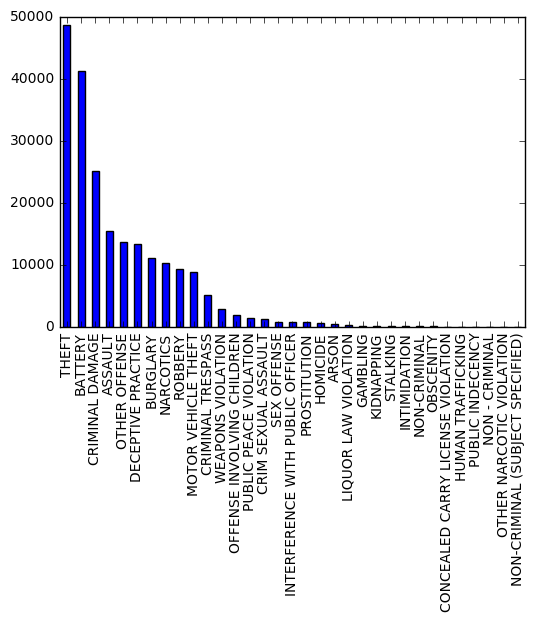

In [49]:
#Total count of different crimes in whole Chicago
fig, ax = plt.subplots()
df['Primary Type'].value_counts().plot(ax=ax, kind='bar')

In [50]:
new_df.columns

Index(['Date', 'Primary Type', 'Arrest', 'Crime Weightage', 'Danger Value',
       'District', 'Label', 'Ward'],
      dtype='object')

In [51]:
mymap = {'THEFT':1,'BATTERY':2,'CRIMINAL DAMAGE':3,'ASSAULT':4,'OTHER OFFENSE':5,
         'DECEPTIVE PRACTICE':6,'BURGLARY':7,'NARCOTICS':8,'ROBBERY':9,'MOTOR VEHICLE THEFT':10,
         'CRIMINAL TRESPASS':11,'WEAPONS VIOLATION':12,'OFFENSE INVOLVING CHILDREN':13,'PUBLIC PEACE VIOLATION':14,
         'CRIM SEXUAL ASSAULT':15,'SEX OFFENSE':16,'INTERFERENCE WITH PUBLIC OFFICER':17,'PROSTITUTION':18,'HOMICIDE':19,'ARSON':20,'LIQUOR LAW VIOLATION':21,
        'GAMBLING':22,'KIDNAPPING':23,'STALKING':24,'INTIMIDATION':25,'NON-CRIMINAL':26,'OBSCENITY':27,'CONCEALED CARRY LICENSE VIOLATION':28,'PUBLIC INDECENCY':29,
        'HUMAN TRAFFICKING':30,'NON - CRIMINAL':31,'OTHER NARCOTIC VIOLATION':32,'NON-CRIMINAL (SUBJECT SPECIFIED)':33}

In [52]:
crime_type = pd.Series(new_df['Primary Type'])

mymap = {'THEFT':1,'BATTERY':2,'CRIMINAL DAMAGE':3,'ASSAULT':4,'OTHER OFFENSE':5,
         'DECEPTIVE PRACTICE':6,'BURGLARY':7,'NARCOTICS':8,'ROBBERY':9,'MOTOR VEHICLE THEFT':10,
         'CRIMINAL TRESPASS':11,'WEAPONS VIOLATION':12,'OFFENSE INVOLVING CHILDREN':13,'PUBLIC PEACE VIOLATION':14,
         'CRIM SEXUAL ASSAULT':15,'SEX OFFENSE':16,'INTERFERENCE WITH PUBLIC OFFICER':17,'PROSTITUTION':18,'HOMICIDE':19,'ARSON':20,'LIQUOR LAW VIOLATION':21,
        'GAMBLING':22,'KIDNAPPING':23,'STALKING':24,'INTIMIDATION':25,'NON-CRIMINAL':26,'OBSCENITY':27,'CONCEALED CARRY LICENSE VIOLATION':28,'PUBLIC INDECENCY':29,
        'HUMAN TRAFFICKING':30,'NON - CRIMINAL':31,'OTHER NARCOTIC VIOLATION':32,'NON-CRIMINAL (SUBJECT SPECIFIED)':33}

### Function to assign Crime Scores to different Crime Types (Primary Types)

In [53]:
def crime_score(x):
    
    if x=='THEFT':
        return 1
    elif x=='BATTERY':
        return 2
    elif x =='CRIMINAL DAMAGE':
        return 3
    elif x == 'ASSAULT':
        return 3
    elif x == 'OTHER OFFENSE': #delete this entry
        return 2
    elif x == 'DECEPTIVE PRACTICE':
        return 1
    elif x == 'BURGLARY':
        return 2
    elif x == 'NARCOTICS':
        return 4
    elif x =='ROBBERY':
        return 1
    elif x == 'MOTOR VEHICLE THEFT':
        return 2
    elif x =='CRIMINAL TRESPASS':
        return 3
    elif x == 'WEAPONS VIOLATION':
        return 2
    elif x == 'OFFENSE INVOLVING CHILDREN':
        return 4
    elif x == 'PUBLIC PEACE VIOLATION':
        return 3
    elif x == 'CRIM SEXUAL ASSAULT':
        return 4
    elif x == 'SEX OFFENSE':
        return 4
    elif x == 'INTERFERENCE WITH PUBLIC OFFICER':
        return 4
    elif x == 'PROSTITUTION':
        return 4
    elif x == 'HOMICIDE':
        return 4
    elif x == 'ARSON': 
        return 3
    elif x == 'LIQUOR LAW VIOLATION':
        return 1
    elif x =='GAMBLING':
        return 1
    elif x =='KIDNAPPING':
        return 3
    elif x =='STALKING':
        return 1
    elif x == 'INTIMIDATION':
        return 1
    elif x == 'NON-CRIMINAL':
        return 0
    elif x =='OBSCENITY':
        return 2
    elif x == 'CONCEALED CARRY LICENSE VIOLATION':
        return 3
    elif x == 'PUBLIC INDECENCY':
        return 2
    elif x == 'HUMAN TRAFFICKING':
        return 4
    elif x == 'NON - CRIMINAL':
        return 0
    elif x == 'OTHER NARCOTIC VIOLATION':
        return 4
    elif x == 'NON-CRIMINAL (SUBJECT SPECIFIED)':
        return 0

def arrest_score(x):
    if x=='TRUE':
        return 1
    elif x=='FALSE':
        return 0
    elif x=='True':
        return 1
    elif x=='False':
        return 0
    
    

In [54]:
#Adding Crime Weightage which is equal to Crime Score of that particualr Crime Type + 1 if there is an Arrest and 0 if no Arrest
new_df['Crime Weightage'] = new_df['Primary Type'].apply(crime_score) + new_df['Arrest'].astype(int)

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Crime Scores added to column Crime Weightage successfully as seen below

In [55]:
new_df.head(10)

,Date,Primary Type,Arrest,Crime Weightage,Danger Value,District,Label,Ward
0,05/03/2016 09:00:00 PM,NARCOTICS,True,5,,11,,28
1,05/03/2016 09:35:00 PM,THEFT,False,1,,8,,13
2,05/03/2016 02:45:00 PM,ASSAULT,False,3,,9,,12
3,05/03/2016 06:42:00 PM,BATTERY,False,2,,8,,15
4,05/03/2016 03:00:00 PM,ROBBERY,False,1,,3,,6
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,True,3,,11,,28
6,05/03/2016 03:30:00 PM,ASSAULT,False,3,,11,,24
7,05/03/2016 09:09:00 PM,THEFT,True,2,,3,,20
8,05/03/2016 09:42:00 PM,NARCOTICS,True,5,,3,,20
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,True,3,,7,,17


In [56]:
#fig, ax = plt.subplots()
#new_df['Arrest'].value_counts().plot(ax=ax, kind='bar')

### Crime frequencies in various districts below

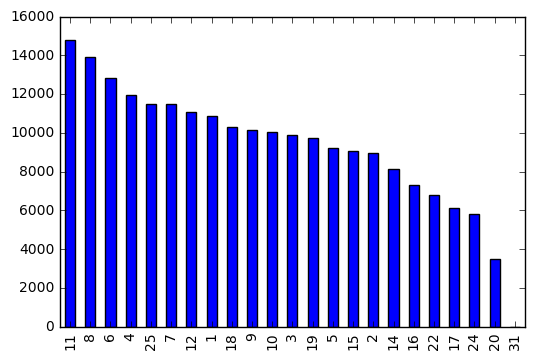

In [57]:
fig, ax = plt.subplots()
new_df['District'].value_counts().plot(ax=ax, kind='bar')

In [58]:
new_df.describe()

,Crime Weightage,District,Ward
count,213464.000000,213464.000000,213464.000000
mean,2.228549,11.223766,22.974057
std,1.115958,6.891420,13.921673
min,0.000000,1.000000,1.000000
25%,1.000000,6.000000,10.000000
50%,2.000000,10.000000,23.000000
75%,3.000000,17.000000,34.000000
max,5.000000,31.000000,50.000000


In [59]:
cleaned_df = new_df.groupby(['District','Primary Type']).agg({'Crime Weightage':'mean', 'Primary Type':'count'})

In [60]:
cleaned_df.rename(columns={'Primary Type':'Counts'},inplace=True)

In [61]:
cleaned_df.describe()

,Crime Weightage,Counts
count,610.000000,610.000000
mean,2.810069,349.940984
std,1.337061,632.843057
min,0.000000,1.000000
25%,2.000000,7.000000
50%,3.000000,55.000000
75%,4.000000,436.000000
max,5.000000,5237.000000


In [62]:
cleaned_df['Danger Value'] = cleaned_df['Crime Weightage'] * cleaned_df['Counts']


### Danger Value calculated

In [63]:
cleaned_df.head(10)

Crime Weightage  Counts  Danger Value
District Primary Type                                              
1        ARSON                       3.333333       3          10.0
         ASSAULT                     3.229814     483        1560.0
         BATTERY                     2.254252    1117        2518.0
         BURGLARY                    2.060976     164         338.0
         CRIM SEXUAL ASSAULT         4.050847      59         239.0
         CRIMINAL DAMAGE             3.079545     616        1897.0
         CRIMINAL TRESPASS           3.795918     441        1674.0
         DECEPTIVE PRACTICE          1.042083    1402        1461.0
         HOMICIDE                    4.777778       9          43.0
         HUMAN TRAFFICKING           4.000000       1           4.0

### Populating the original dataframe (new_df) with Danger Values 

In [64]:
i = 0
safe = list();
for index, row in cleaned_df.iterrows():
    safe.append(row['Danger Value'])
    new_df.loc[(new_df['District'] == index[0]) & (new_df['Primary Type'] == index[1]), 'Danger Value'] = safe[i]
    i = i + 1

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [65]:
new_df['Danger Value'] = new_df['Danger Value'].astype(float)

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Here we can see the  various order statistics for Danger Value in Column 2

In [66]:
new_df.describe()

,Crime Weightage,Danger Value,District,Ward
count,213464.000000,213464.000000,213464.000000,213464.000000
mean,2.228549,2849.588301,11.223766,22.974057
std,1.115958,2205.798578,6.891420,13.921673
min,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1172.000000,6.000000,10.000000
50%,2.000000,2327.000000,10.000000,23.000000
75%,3.000000,4052.000000,17.000000,34.000000
max,5.000000,13349.000000,31.000000,50.000000


### Setting the mean of Danger Value as Threshold for creating the concept (Y) for our dataframe

In [67]:
threshold = new_df['Danger Value'].mean()

In [68]:
def compareThreshold(x):
    if x > threshold:
        return 1
    elif x <= threshold:
        return 0

### Assigning values to 'Label' based on Threshold

In [69]:
new_df['Label'] = new_df['Danger Value'].apply(compareThreshold)

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Final Data Frame. Below you can see that now the 'Label' column has our Y which is in the form of 1 and 0
### 1 --> Danger Value > Threshold --> Very Unsafe
### 2 --> Danger Value < Threshold --> Comparitively Safe

In [70]:
new_df.head(50)

,Date,Primary Type,Arrest,Crime Weightage,Danger Value,District,Label,Ward
0,05/03/2016 09:00:00 PM,NARCOTICS,True,5,13349.0,11,1,28
1,05/03/2016 09:35:00 PM,THEFT,False,1,3159.0,8,1,13
2,05/03/2016 02:45:00 PM,ASSAULT,False,3,2632.0,9,0,12
3,05/03/2016 06:42:00 PM,BATTERY,False,2,5510.0,8,1,15
4,05/03/2016 03:00:00 PM,ROBBERY,False,1,583.0,3,0,6
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,True,3,1879.0,11,0,28
6,05/03/2016 03:30:00 PM,ASSAULT,False,3,3470.0,11,1,24
7,05/03/2016 09:09:00 PM,THEFT,True,2,1645.0,3,0,20
8,05/03/2016 09:42:00 PM,NARCOTICS,True,5,1550.0,3,0,20
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,True,3,2003.0,7,0,17


In [71]:
new_df.columns

Index(['Date', 'Primary Type', 'Arrest', 'Crime Weightage', 'Danger Value',
       'District', 'Label', 'Ward'],
      dtype='object')

### Printing the Data Shape

In [72]:
print(new_df.shape)

(213464, 8)


### Histogram for Target

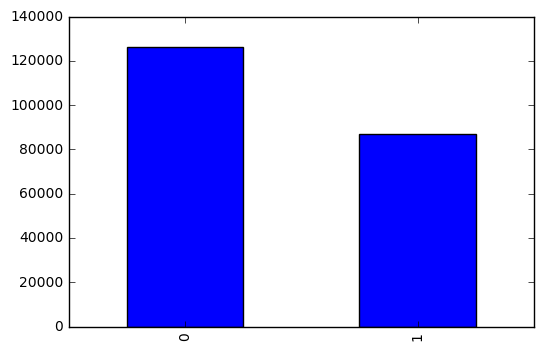

In [73]:
fig, ax = plt.subplots()
new_df['Label'].value_counts().plot(ax=ax, kind='bar')

### Plotting the Average Danger Value per District

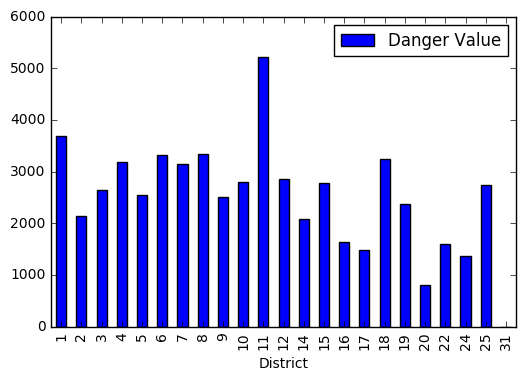

In [74]:
fig, ax = plt.subplots()
plot1_df = new_df.groupby(['District']).agg({'Danger Value':'mean'}).plot(kind = 'bar', ax=ax)

### Average Safe and Unsafe Target Values per District

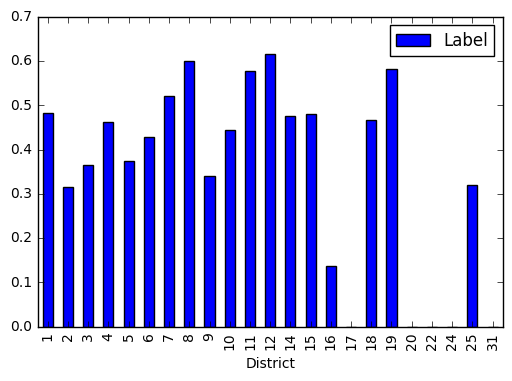

In [75]:
fig, ax = plt.subplots()
plot2_df = new_df.groupby(['District']).agg({'Label':'mean'}).plot(kind = 'bar', ax=ax)

### Mean for the Target

In [76]:
new_df['Label'].mean()

0.40839204737098528

### Variance for Target

In [77]:
new_df['Label'].var()

0.24160911486458828

### Box Plot for Target

{'boxes': [<matplotlib.lines.Line2D at 0x116a705f8>,
 'caps': [<matplotlib.lines.Line2D at 0x116a72f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b4e5940>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11b4e1a58>,
 'whiskers': [<matplotlib.lines.Line2D at 0x116a70ef0>,
  <matplotlib.lines.Line2D at 0x11b508da0>]}

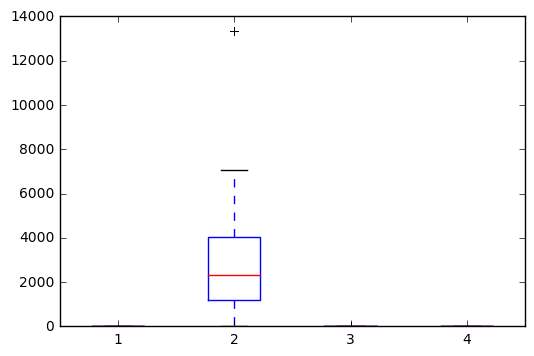

In [78]:
plt.boxplot([new_df['Label'],new_df['Danger Value'],new_df['Arrest'],new_df['Crime Weightage']])